<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Session 6)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[ADABoost](#ada)**
2. **[Gradient Boosting](#gb)**
3. **[Extreme Gradient Boosting (XGB)](#xgb)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, plot_roc_curve, make_scorer
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import AdaBoostClassifier

In [2]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

#### Load the csv file

In [3]:
# load the csv file
df_employee = pd.read_csv('Employee-Attrition.csv')

# display the first five observations
df_employee.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,41,Yes,Travel_Rarely,Sales,1,Life Sciences,2,Female,3,2,Sales Executive,4,5993,8,Yes,11,3,6
1,49,No,Travel_Frequently,Research & Development,8,Life Sciences,3,Male,2,2,Research Scientist,2,5130,1,No,23,4,10
2,37,Yes,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,3,2090,6,Yes,15,3,0
3,33,No,Travel_Frequently,Research & Development,3,Life Sciences,4,Female,3,1,Research Scientist,3,2909,1,Yes,11,3,8
4,27,No,Travel_Rarely,Research & Development,2,Medical,1,Male,3,1,Laboratory Technician,2,3468,9,No,12,3,2


**Data Preparation**

In [4]:
df_employee.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
EducationField             False
EnvironmentSatisfaction    False
Gender                     False
JobInvolvement             False
JobLevel                   False
JobRole                    False
JobSatisfaction            False
MonthlyIncome              False
NumCompaniesWorked         False
OverTime                   False
PercentSalaryHike          False
PerformanceRating          False
YearsAtCompany             False
dtype: bool

In [5]:
df_employee.describe()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,7.008163
std,9.135373,8.106864,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,9.000000
max,60.000000,29.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,40.000000


In [6]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   Gender                   1470 non-null   object
 8   JobInvolvement           1470 non-null   int64 
 9   JobLevel                 1470 non-null   int64 
 10  JobRole                  1470 non-null   object
 11  JobSatisfaction          1470 non-null   int64 
 12  MonthlyIncome            1470 non-null   int64 
 13  NumCompaniesWorked       1470 non-null   int64 
 14  OverTime                 1470 non-null  

In [7]:
for i in df_employee.select_dtypes(include='object').columns:
    print(i , df_employee[i].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
OverTime ['Yes' 'No']


In [8]:
df_employee['Attrition'] = df_employee['Attrition'].map({'Yes':1,'No':0})
df_employee.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,41,1,Travel_Rarely,Sales,1,Life Sciences,2,Female,3,2,Sales Executive,4,5993,8,Yes,11,3,6
1,49,0,Travel_Frequently,Research & Development,8,Life Sciences,3,Male,2,2,Research Scientist,2,5130,1,No,23,4,10
2,37,1,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,3,2090,6,Yes,15,3,0
3,33,0,Travel_Frequently,Research & Development,3,Life Sciences,4,Female,3,1,Research Scientist,3,2909,1,Yes,11,3,8
4,27,0,Travel_Rarely,Research & Development,2,Medical,1,Male,3,1,Laboratory Technician,2,3468,9,No,12,3,2


In [9]:
cat_cols = df_employee.select_dtypes(include='object').columns.to_list()
df_num = df_employee.select_dtypes(include = np.number)

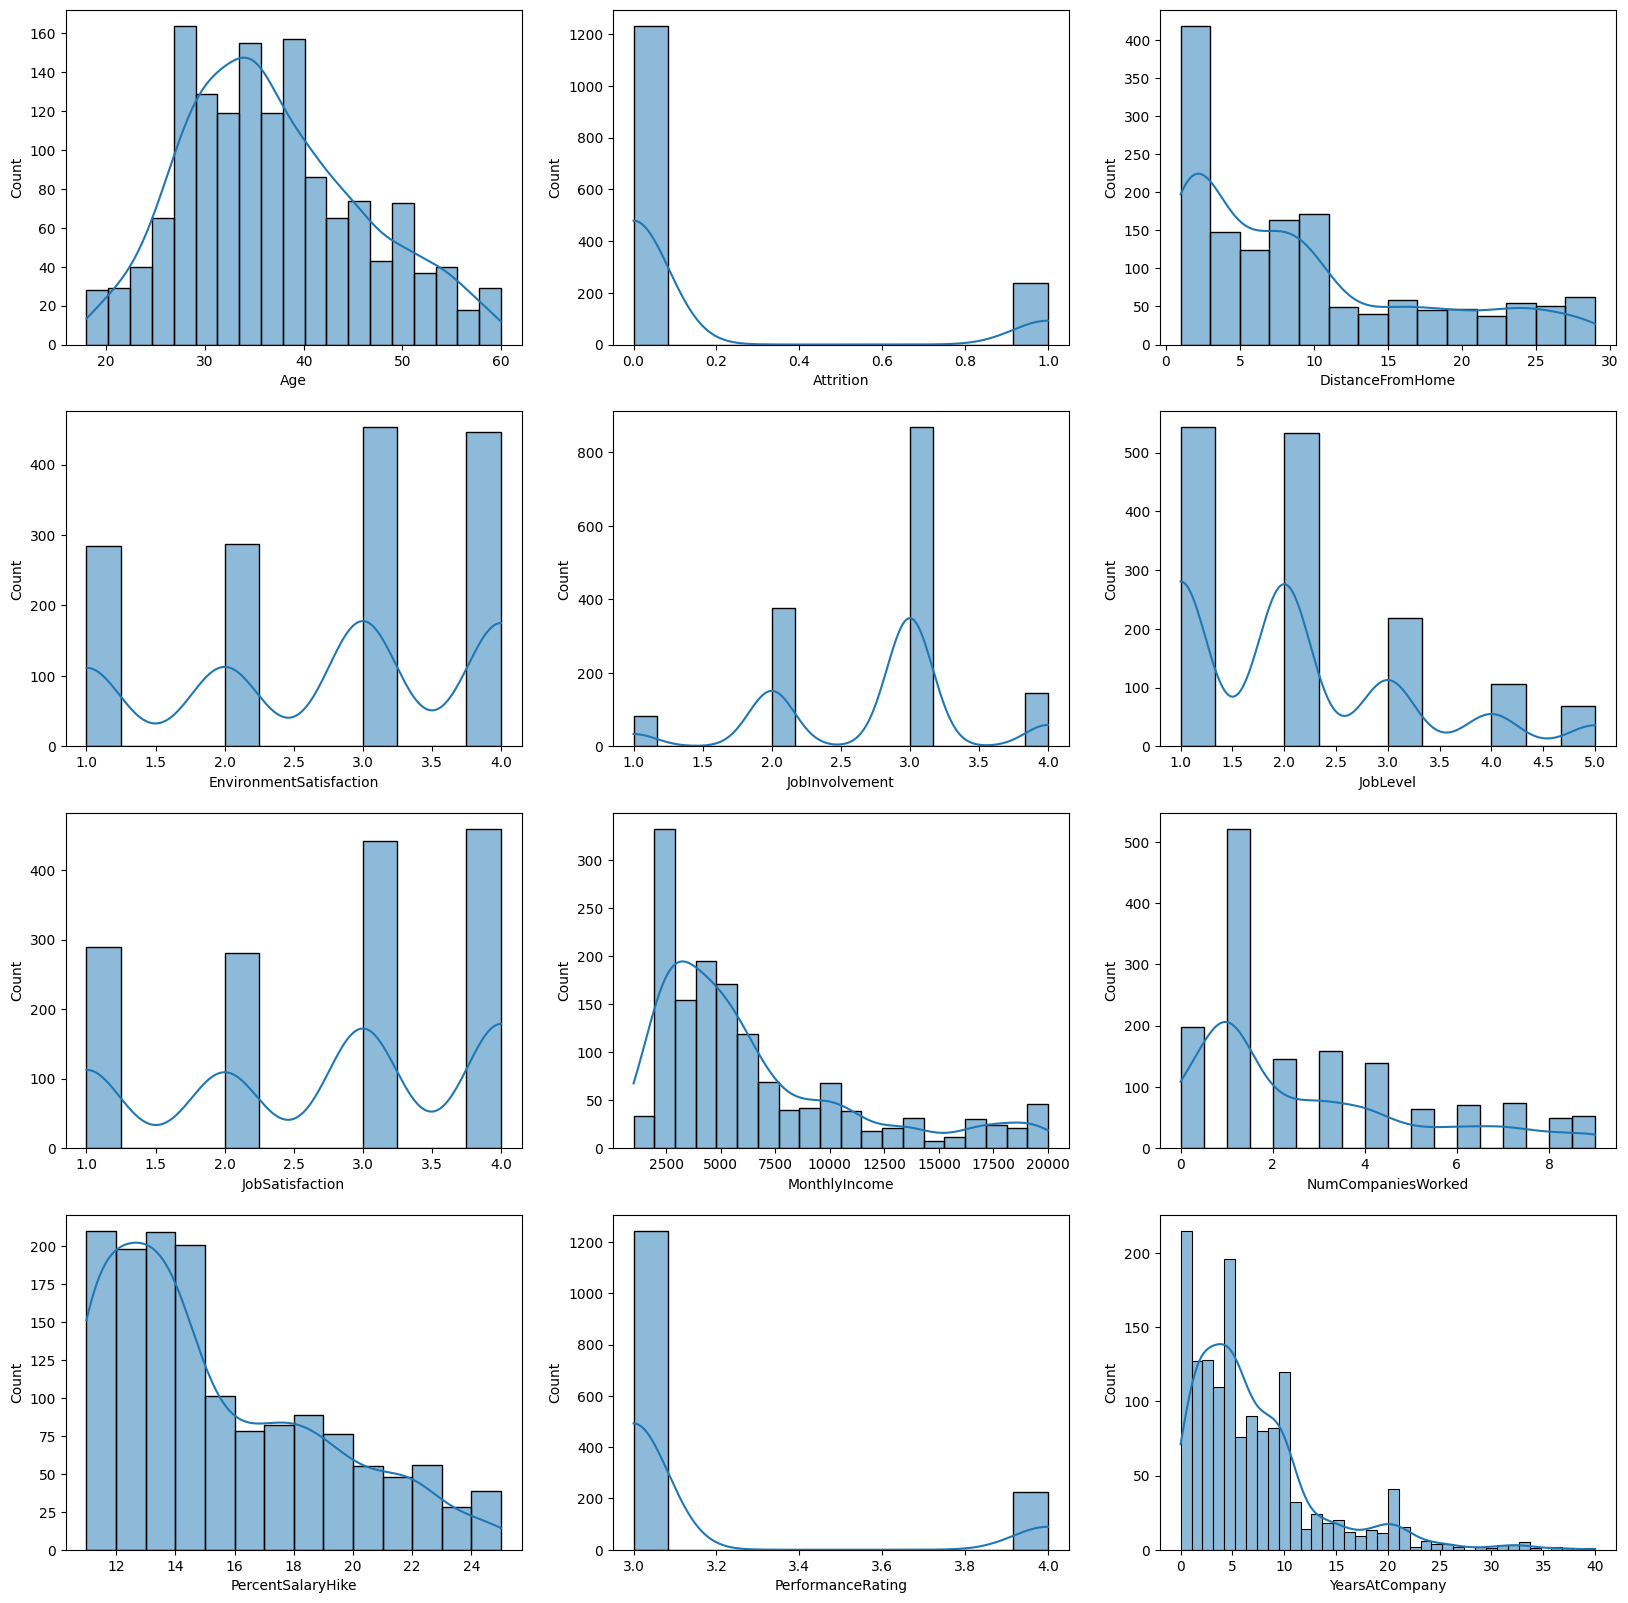

In [10]:
plt.figure(figsize =[20,20])
i = 1
for col in df_num:
    ax = plt.subplot(4,3,i)
    sns.histplot(df_num[col] , kde = True)
    i = i+1

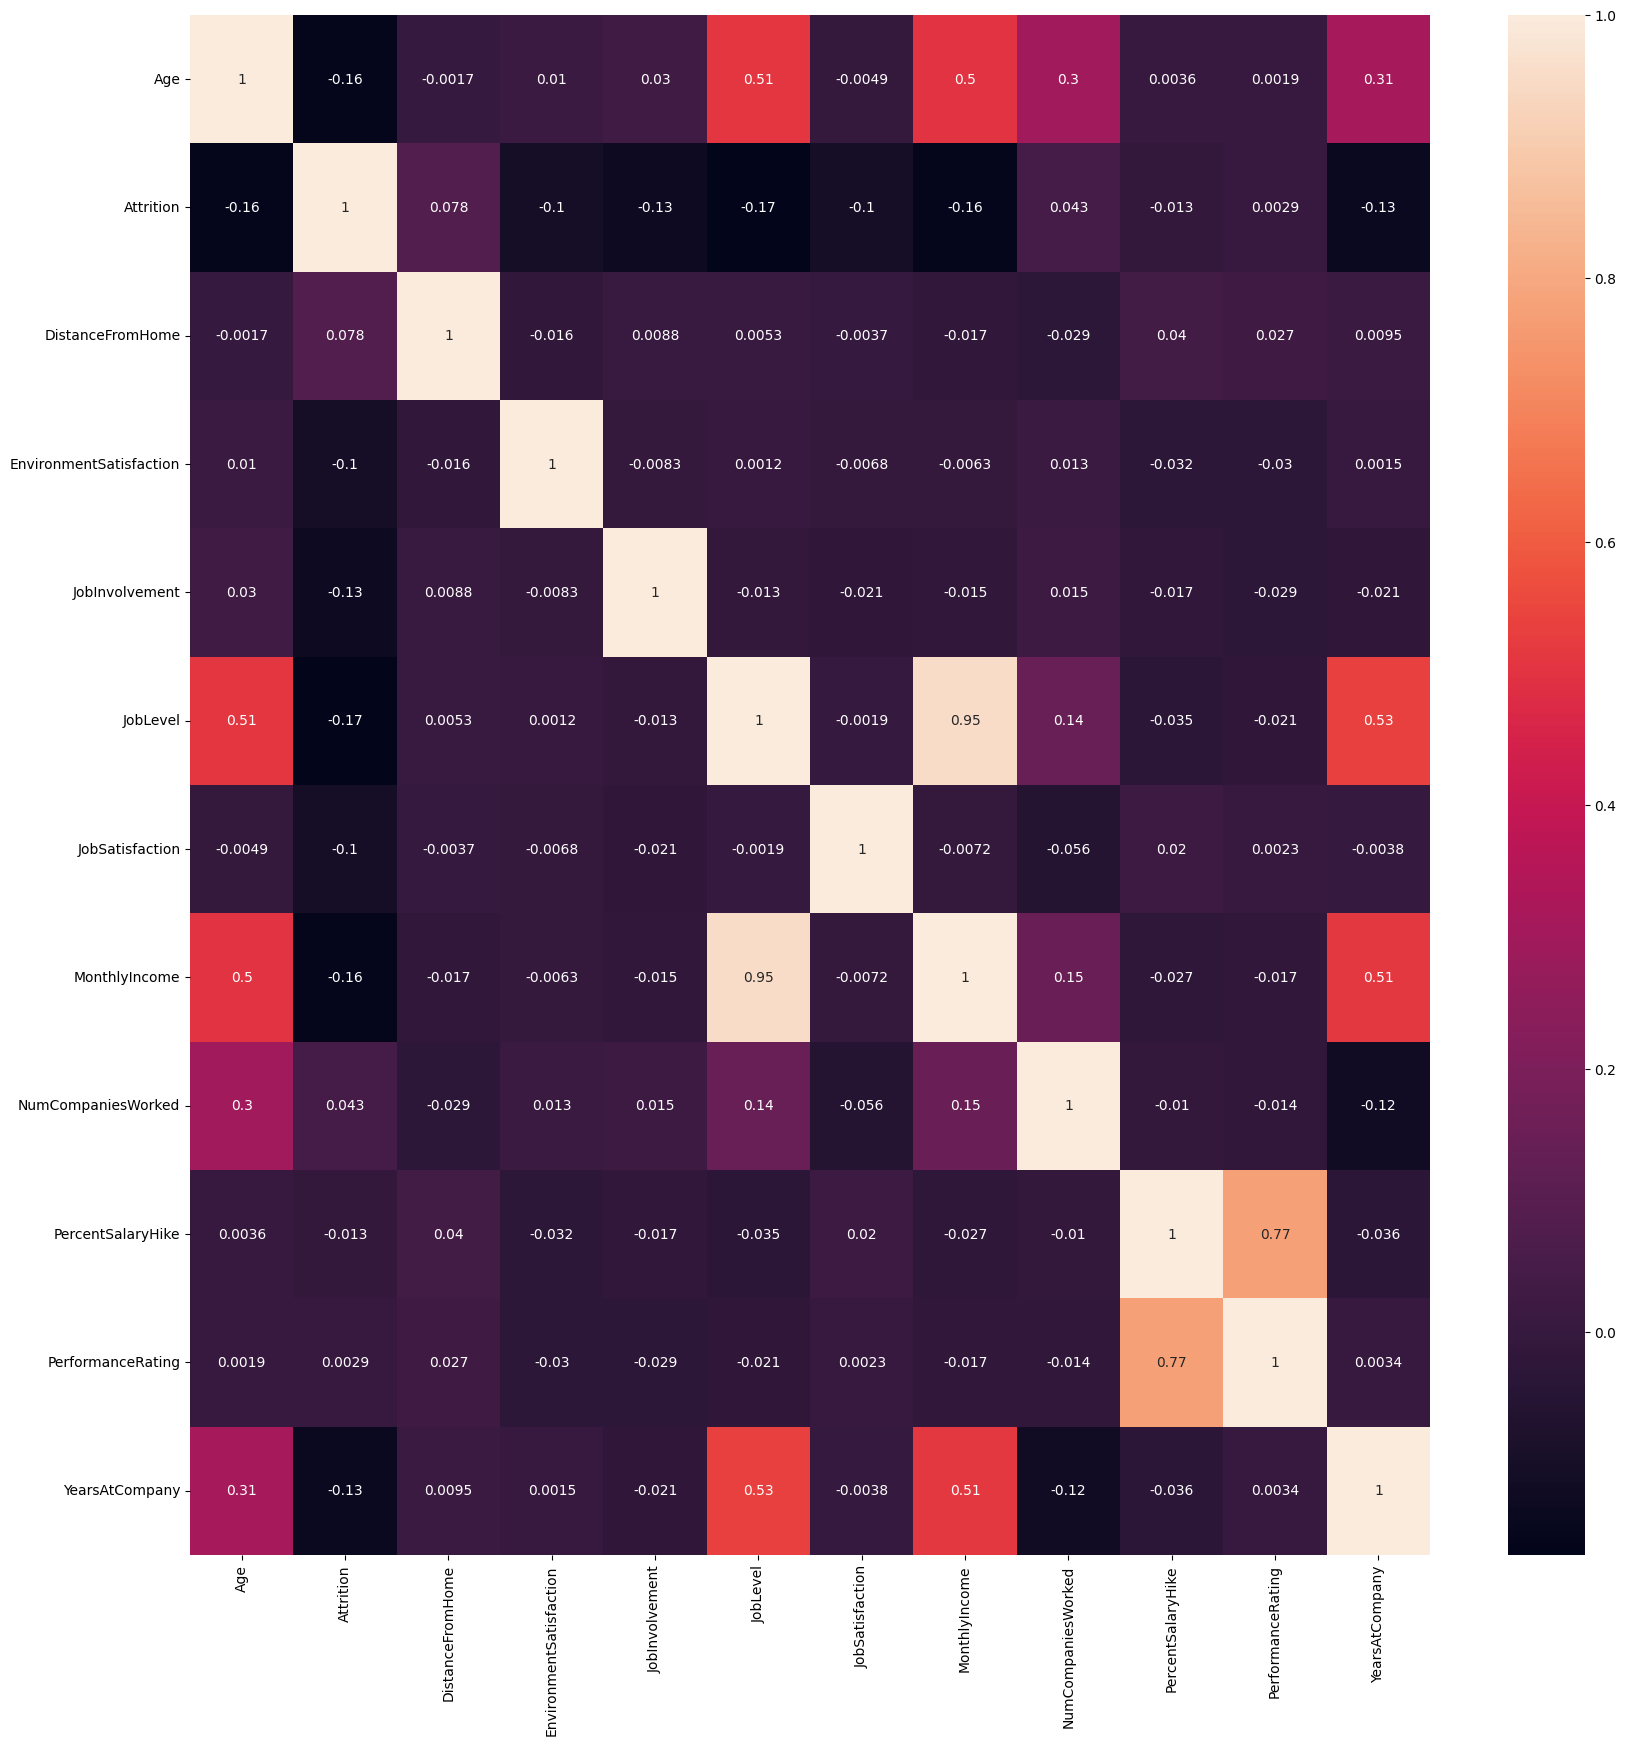

In [11]:
plt.figure(figsize =[20,20])
corr_matrix = df_num.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [12]:
df_employee = pd.get_dummies(data=df_employee,columns=cat_cols,drop_first=True)
df_employee.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,41,1,1,2,3,2,4,5993,8,11,...,0,0,0,0,0,0,0,1,0,1
1,49,0,8,3,2,2,2,5130,1,23,...,1,0,0,0,0,0,1,0,0,0
2,37,1,2,4,2,1,3,2090,6,15,...,1,0,1,0,0,0,0,0,0,1
3,33,0,3,4,3,1,3,2909,1,11,...,0,0,0,0,0,0,1,0,0,1
4,27,0,2,1,3,1,2,3468,9,12,...,1,0,1,0,0,0,0,0,0,0


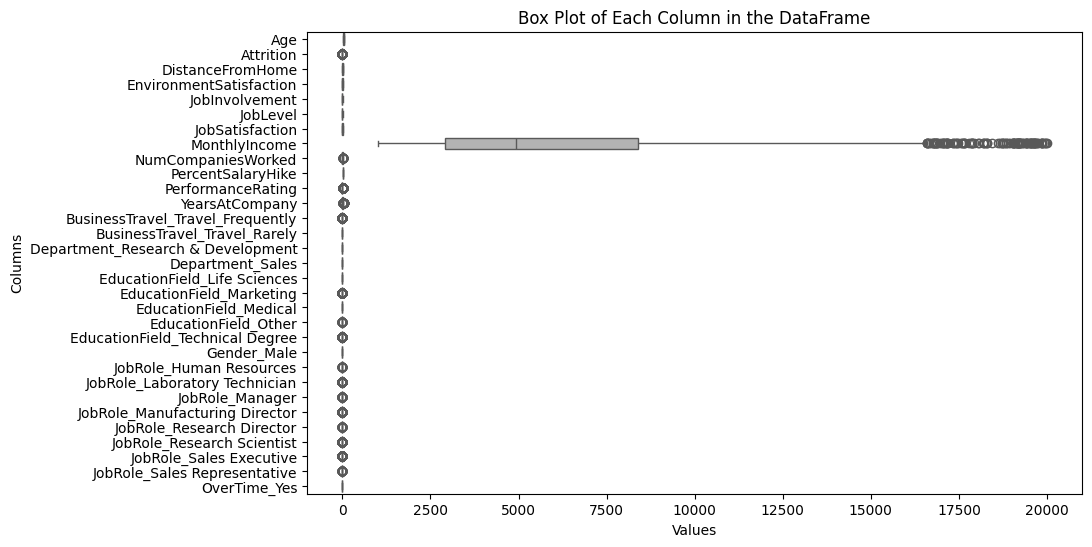

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_employee, orient='h', palette="Set2")
plt.title('Box Plot of Each Column in the DataFrame')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

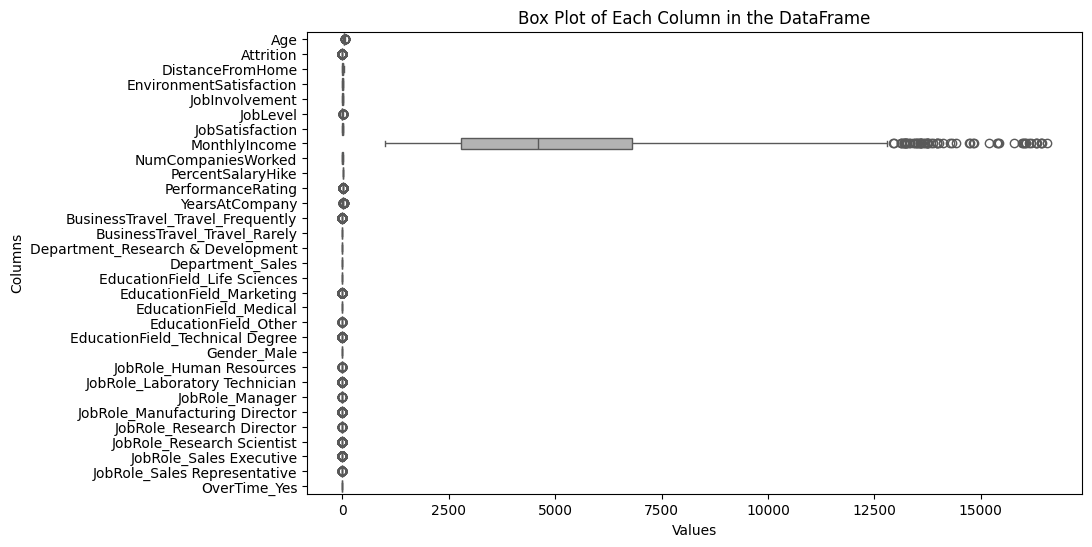

In [14]:
df = remove_outliers(df_employee,['MonthlyIncome','NumCompaniesWorked'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h', palette="Set2")
plt.title('Box Plot of Each Column in the DataFrame')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

<Axes: xlabel='Attrition', ylabel='count'>

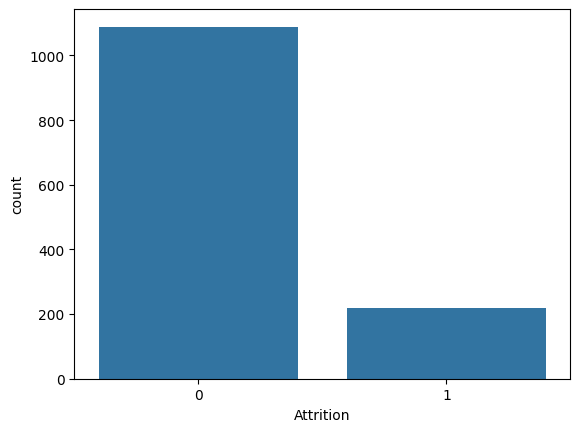

In [15]:
sns.countplot(x='Attrition', data=df)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Convert the Age variable into categorical by dividing it in the ranges; 18-30, 31-40, 41-50, 51-60.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']

# Convert the 'Age' variable into categorical ranges
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Display the DataFrame with the new categorical variable
df.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,41-50,1,1,2,3,2,4,5993,8,11,...,0,0,0,0,0,0,0,1,0,1
1,41-50,0,8,3,2,2,2,5130,1,23,...,1,0,0,0,0,0,1,0,0,0
2,31-40,1,2,4,2,1,3,2090,6,15,...,1,0,1,0,0,0,0,0,0,1
3,31-40,0,3,4,3,1,3,2909,1,11,...,0,0,0,0,0,0,1,0,0,1
5,31-40,0,2,4,3,1,4,3068,0,13,...,1,0,1,0,0,0,0,0,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Employee from which age category has the highest salary?.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# Calculate the average salary for each age category
average_salary_by_age_category = df.groupby('Age')['MonthlyIncome'].mean()

# Find the age category with the highest average salary
age_category_highest_salary = average_salary_by_age_category.idxmax()

print(f"The age category with the highest average salary is: {age_category_highest_salary}")

The age category with the highest average salary is: 51-60


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Dummy encode the categorical variable "Age".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
df = pd.get_dummies(df , columns=['Age'] , drop_first = True)
df.head()

,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,Age_31-40,Age_41-50,Age_51-60
0,1,1,2,3,2,4,5993,8,11,3,...,0,0,0,0,1,0,1,0,1,0
1,0,8,3,2,2,2,5130,1,23,4,...,0,0,0,1,0,0,0,0,1,0
2,1,2,4,2,1,3,2090,6,15,3,...,0,0,0,0,0,0,1,1,0,0
3,0,3,4,3,1,3,2909,1,11,3,...,0,0,0,1,0,0,1,1,0,0
5,0,2,4,3,1,4,3068,0,13,3,...,0,0,0,0,0,0,0,1,0,0


<a id="ada"> </a>
## 1. ADABoost

In [22]:
lt = list(cat_cols)
lt.append('Age')

In [23]:
dummy_encoded_columns = [col for col in df.columns for prefix in lt if col.startswith(prefix)]

## We shall use the employee dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a adaboost model with 40 number of estimators to predict whether or not an employee will leave the company based on all the dummy encoded categorical features only. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
X = df.drop(columns = ['Attrition'], axis=1) 
y = df['Attrition']

# Apply SMOTE over-sampling
smote = SMOTE(random_state=2)
X, y = smote.fit_resample(X, y)

In [25]:
X1 = X[dummy_encoded_columns]
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

ada_model = AdaBoostClassifier(n_estimators=40, random_state=42)
ada_model.fit(X_train, y_train)

# Make predictions
y_pred = ada_model.predict(X_test)

# Calculate the accuracy for the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.841743119266055


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       212
           1       0.90      0.78      0.84       224

    accuracy                           0.84       436
   macro avg       0.85      0.84      0.84       436
weighted avg       0.85      0.84      0.84       436



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a adaboost full model with 40 number of estimators to predict if an employee will leave the company. Generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_model = AdaBoostClassifier(n_estimators=40, random_state=42)
ada_model.fit(X_train, y_train)

# Make predictions
y_pred = ada_model.predict(X_test)

# Calculate the accuracy for the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8532110091743119


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       212
           1       0.86      0.86      0.86       224

    accuracy                           0.85       436
   macro avg       0.85      0.85      0.85       436
weighted avg       0.85      0.85      0.85       436



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6.  Find the area under the receiver operating characteristic curve for full model built in question 5. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

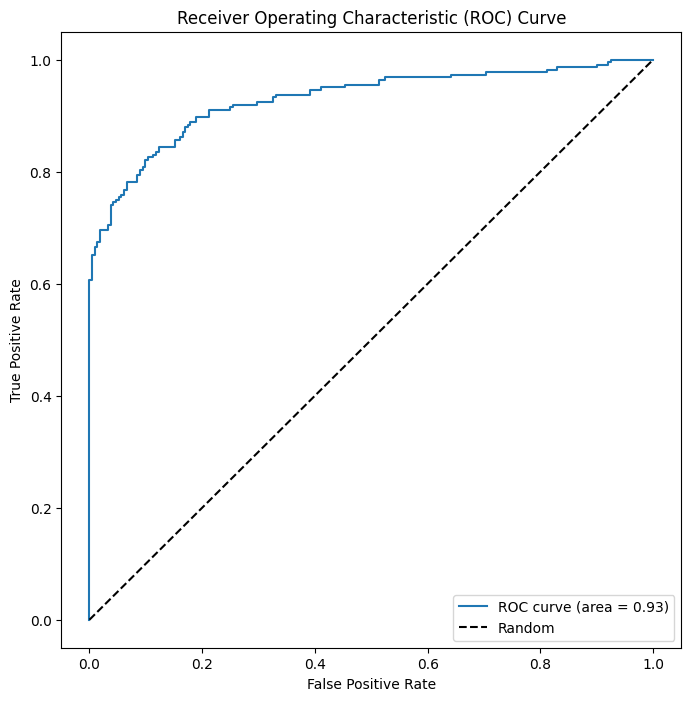

In [29]:
# Get the predicted probabilities for the positive class
y_probs = ada_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_probs)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot a confusion matrix for the full model built above.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: >

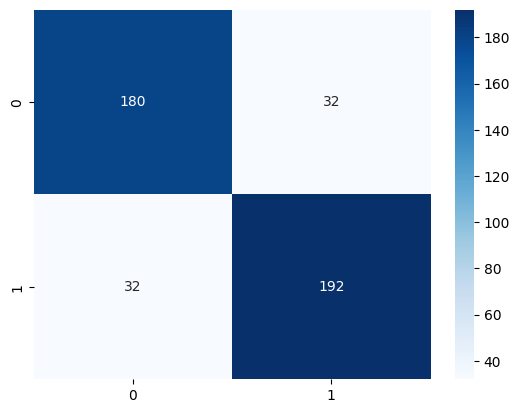

In [30]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# Extract TP, TN, FP, FN from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate sensitivity (recall)
sensitivity = TP / (TP + FN)
# Calculate specificity
specificity = TN / (TN + FP)

# Overall accuracy
accuracy = accuracy_score(y_test, y_pred)

# Percentage of misclassified and correctly classified observations
misclassified_percentage = (1 - accuracy) * 100
correctly_classified_percentage = accuracy * 100

print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")
print(f"Misclassified Percentage: {misclassified_percentage:.2f}%")
print(f"Correctly Classified Percentage: {correctly_classified_percentage:.2f}%")

Specificity: 0.8490566037735849
Sensitivity: 0.8571428571428571
Misclassified Percentage: 14.68%
Correctly Classified Percentage: 85.32%


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the best value of hyperparameters "n_estimators" and "learning_rate" for the adaboost full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1, 10]  # Learning rate
}

# Create an AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)

# Create the GridSearchCV object
grid_search_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search_ada.fit(X_train, y_train)

# Get the best hyperparameters
best_params_ada = grid_search_ada.best_params_

print("Best Hyperparameters for AdaBoost:")
print(best_params_ada)


Best Hyperparameters for AdaBoost:
{'learning_rate': 1, 'n_estimators': 200}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a adaboost model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# Create a Random Forest model using the best hyperparameters
rf_model_tuned = AdaBoostClassifier(
    n_estimators=best_params_ada['n_estimators'],
    learning_rate = best_params_ada['learning_rate'],
    random_state=42
)

# Perform 10-fold cross-validation and calculate ROC-AUC scores
cv_scores = cross_val_score(rf_model_tuned, X_train, y_train, cv=10, scoring=make_scorer(roc_auc_score))

# Calculate the average ROC-AUC score
average_roc_auc = cv_scores.mean()

print("Average ROC-AUC score from 10-fold cross-validation:", average_roc_auc)

<IPython.core.display.Javascript object>

Average ROC-AUC score from 10-fold cross-validation: 0.8845468518383515


<a id="gb"> </a>
## 2. Gradient Boosting

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Build the gradient boosting model 100 estimators and maximum depth 3. Also, find the accuracy score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a GradientBoostingClassifier with 100 estimators and max depth of 3
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

<IPython.core.display.Javascript object>

Accuracy Score: 0.88


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>12. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6]
}

# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters on the entire training set
best_gbc = GradientBoostingClassifier(**best_params, random_state=42)
best_gbc.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_gradient = best_gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best parameters found: {best_params}")
print(f"Accuracy on test set: {accuracy}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best parameters found: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 300}
Accuracy on test set: 0.9288990825688074


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>13. Build the gradient boosting model and an adaboost model with their best parameters and generate a classification report for both of them. Which model is the best and why?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
# The gradient boosting model
print(classification_report(y_test, y_pred_gradient))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       212
           1       0.94      0.92      0.93       224

    accuracy                           0.93       436
   macro avg       0.93      0.93      0.93       436
weighted avg       0.93      0.93      0.93       436



In [56]:
rf_model_tuned.fit(X_train, y_train)
y_pred_ada = rf_model_tuned.predict(X_test)

print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       212
           1       0.88      0.86      0.87       224

    accuracy                           0.87       436
   macro avg       0.87      0.87      0.87       436
weighted avg       0.87      0.87      0.87       436



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Plot the area under the receiver operating characteristic curve for tuned gradient boosting model built in question 13. Also plot a confusion matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

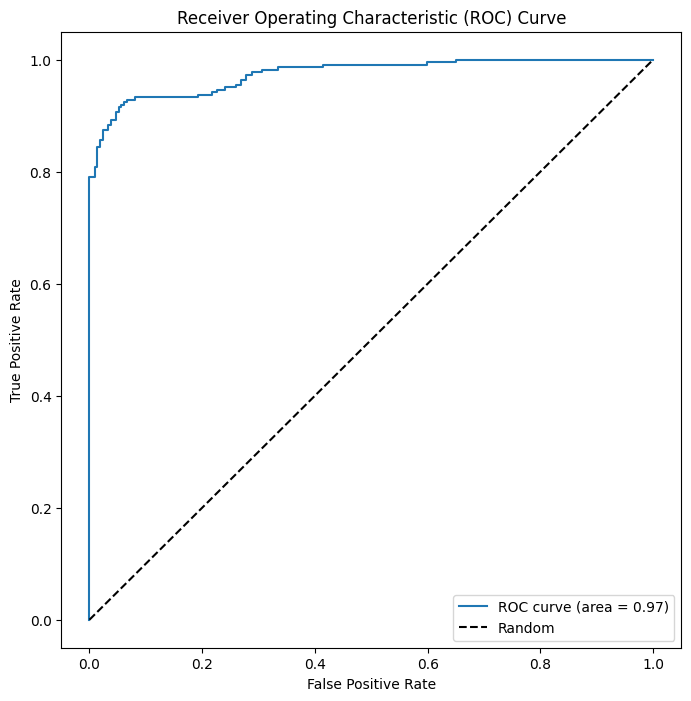

In [57]:
# Get the predicted probabilities for the positive class
y_probs = best_gbc.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_probs)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<Axes: >

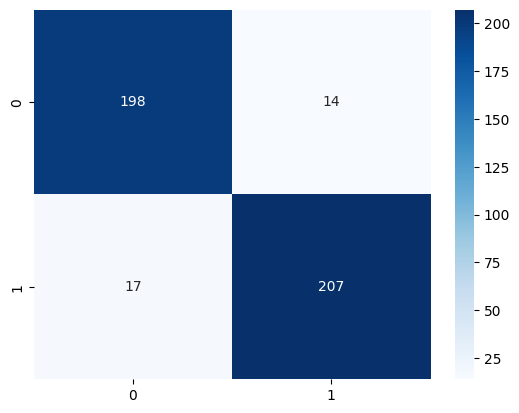

In [58]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

<a id="xgb"> </a>
## 3. Extreme Gradient Boosting (XGB)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build the XGBoost model with a learning rate of 0.01 and gamma equal to 2. Calculate the roc_auc score and generate a classification rerport.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
from xgboost import XGBClassifier

In [61]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the XGBoost model with specified hyperparameters
xgb_model = XGBClassifier(learning_rate=0.01, gamma=2, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict probabilities of class 1 (positive class) for the test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

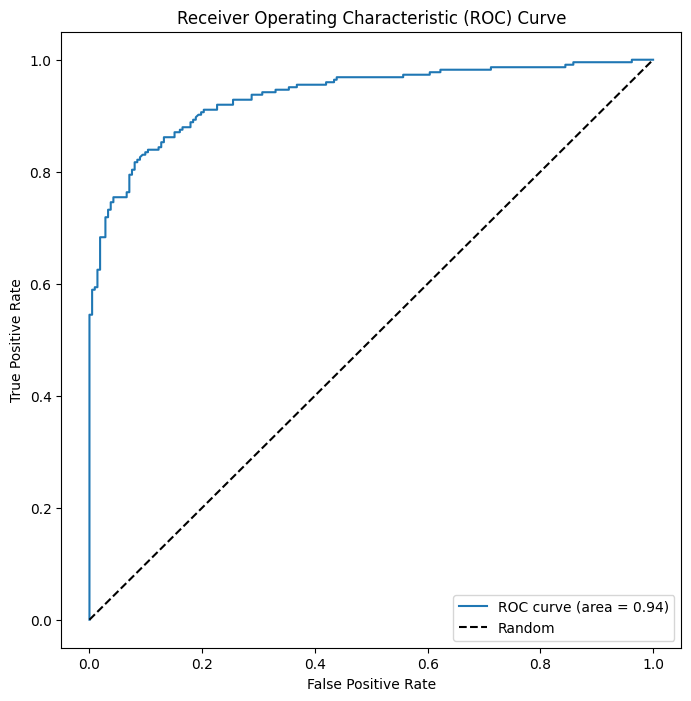

In [62]:
# Get the predicted probabilities for the positive class
y_probs = xgb_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_probs)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [64]:
y_pred = xgb_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       212
           1       0.88      0.84      0.86       224

    accuracy                           0.86       436
   macro avg       0.86      0.86      0.86       436
weighted avg       0.86      0.86      0.86       436



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>16. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the extreme gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
# Initialize the XGBoost Classifier
xgb = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters on the entire training set
best_xgb = XGBClassifier(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best parameters found: {best_params}")
print(f"Accuracy on test set: {accuracy}")

Best parameters found: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200}
Accuracy on test set: 0.9151376146788991


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>17. Plot the connfusion matrix for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: >

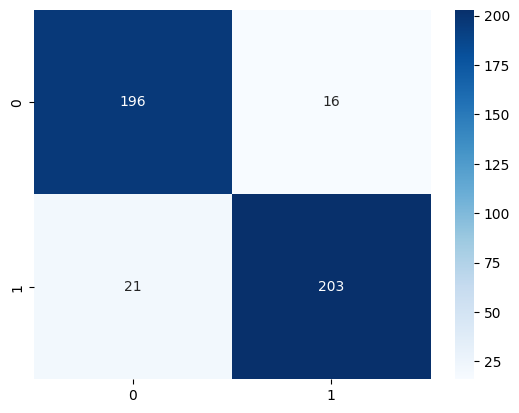

In [66]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>18. Plot the area under the receiver operating characteristic curve for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

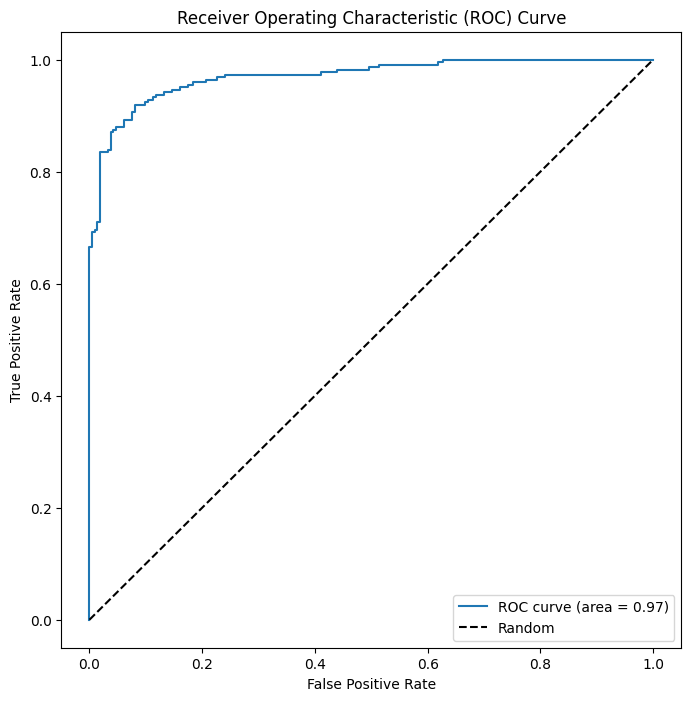

In [67]:
# Get the predicted probabilities for the positive class
y_probs = best_xgb.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_probs)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>19. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Adaboost model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [69]:
from sklearn.ensemble import StackingClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base learners
base_learners = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
]

# Define the final estimator
final_estimator = AdaBoostClassifier(random_state=42)

# Initialize the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=final_estimator)

# Fit the stacking classifier to the training data
stacking_clf.fit(X_train, y_train)

# Predict probabilities of class 1 (positive class) for the test set
y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9629169474393531


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>20. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Gradient Boosting model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [70]:
binary_mask = y < 2
X1, y1 = X[binary_mask], y[binary_mask]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Define base learners
base_learners = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
]

# Define the final estimator
final_estimator = GradientBoostingClassifier(random_state=42)

# Initialize the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=final_estimator)

# Fit the stacking classifier to the training data
stacking_clf.fit(X_train, y_train)

# Predict probabilities of class 1 (positive class) for the test set
y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC Score:", roc_auc)

<IPython.core.display.Javascript object>

ROC AUC Score: 0.9568206704851754
